## Задача 1
Постройте график
Назовите график
Сделайте именование оси x и оси y
Сделайте выводы

### 1.1. Скачать данные по ссылке https://www.kaggle.com/datasets/ionaskel/laptop-prices

In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('./kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

### 1.2 Изучите стоимости недвижимости

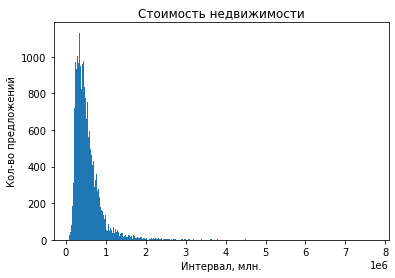

In [6]:
plt.figure(figsize=(6, 4))

plt.hist(df['price'], bins='auto')

plt.title('Стоимость недвижимости')
plt.xlabel('Интервал, млн.')
plt.ylabel('Кол-во предложений');

### 1.3 Изучите распределение квадратуры жилой

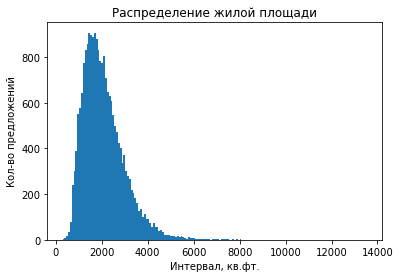

In [7]:
plt.figure(figsize=(6, 4))

plt.hist(df['sqft_living'], bins='auto')

plt.title('Распределение жилой площади')
plt.xlabel('Интервал, кв.фт.')
plt.ylabel('Кол-во предложений');

### 1.4 Изучите распределение года постройки

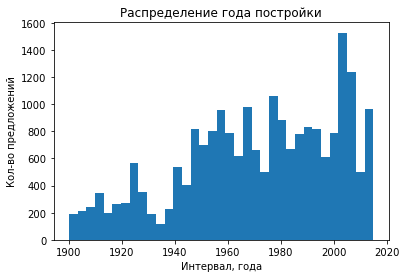

In [8]:
plt.figure(figsize=(6, 4))

plt.hist(df['yr_built'], bins='auto')

plt.title('Распределение года постройки')
plt.xlabel('Интервал, года')
plt.ylabel('Кол-во предложений');

## 2 задача

### 2.1 Изучите распределение домов от наличия вида на набережную
Постройте график
Сделайте выводы

In [9]:
data = df['waterfront'].value_counts()
data.index = ['no waterfront', 'with waterfront']
data.head()

no waterfront      21450
with waterfront      163
Name: waterfront, dtype: int64

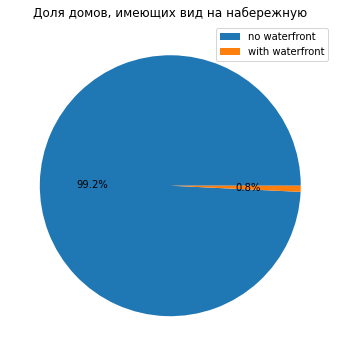

In [10]:
plt.figure(figsize=(8, 6))

plt.pie(data, autopct='%1.1f%%')

plt.title('Доля домов, имеющих вид на набережную')
plt.legend(data.index);

Очевидно, что подавляющее большинство домов, находящихся в продаже, не имеет вида на набережную 

### 2.2 Изучите распределение этажей домов

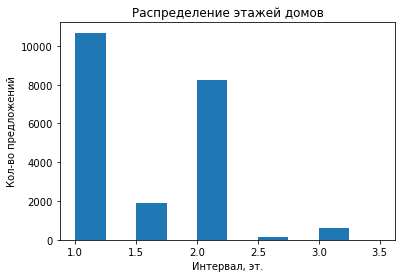

In [11]:
plt.figure(figsize=(6, 4))

plt.hist(df['floors'], bins=10)

plt.title('Распределение этажей домов')
plt.xlabel('Интервал, эт.')
plt.ylabel('Кол-во предложений');

## 2.3 Изучите распределение состояния домов

In [12]:
data = df['condition'].value_counts().reset_index()
data.head()

,index,condition
0,3,14031
1,4,5679
2,5,1701
3,2,172
4,1,30


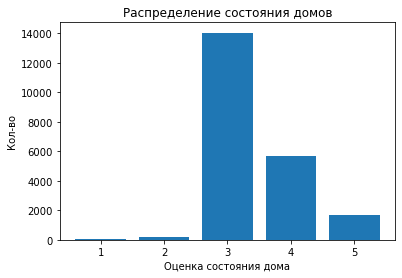

In [13]:
plt.figure(figsize=(6, 4))

plt.bar(data['index'], data['condition'])

plt.title('Распределение состояния домов')
plt.xlabel('Оценка состояния дома')
plt.ylabel('Кол-во');

### 3 задача
Исследуйте, какие характеристики недвижимости влияют на стоимость недвижимости, с применением не менее 5 диаграмм из урока.
Анализ сделайте в формате storytelling: дополнить каждый график письменными выводами и наблюдениями.

In [14]:
corr_matrix = df.corr()
corr_matrix = np.round(corr_matrix, 1)
corr_matrix[np.abs(corr_matrix) < 0.3] = 0
corr_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
price,0.0,1.0,0.3,0.5,0.7,0.0,0.3,0.3,0.4,0.0,0.7,0.6,0.3,0.0,0.0,0.0,0.3,0.0,0.6,0.0
bedrooms,0.0,0.3,1.0,0.5,0.6,0.0,0.0,0.0,0.0,0.0,0.4,0.5,0.3,0.0,0.0,0.0,0.0,0.0,0.4,0.0
bathrooms,0.0,0.5,0.5,1.0,0.8,0.0,0.5,0.0,0.0,0.0,0.7,0.7,0.3,0.5,0.0,0.0,0.0,0.0,0.6,0.0
sqft_living,0.0,0.7,0.6,0.8,1.0,0.0,0.4,0.0,0.3,0.0,0.8,0.9,0.4,0.3,0.0,0.0,0.0,0.0,0.8,0.0
sqft_lot,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7
floors,0.0,0.3,0.0,0.5,0.4,0.0,1.0,0.0,0.0,-0.3,0.5,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.3,0.0
waterfront,0.0,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
view,0.0,0.4,0.0,0.0,0.3,0.0,0.0,0.4,1.0,0.0,0.3,0.0,0.3,0.0,0.0,0.0,0.0,0.0,0.3,0.0
condition,0.0,0.0,0.0,0.0,0.0,0.0,-0.3,0.0,0.0,1.0,0.0,0.0,0.0,-0.4,0.0,0.0,0.0,0.0,0.0,0.0


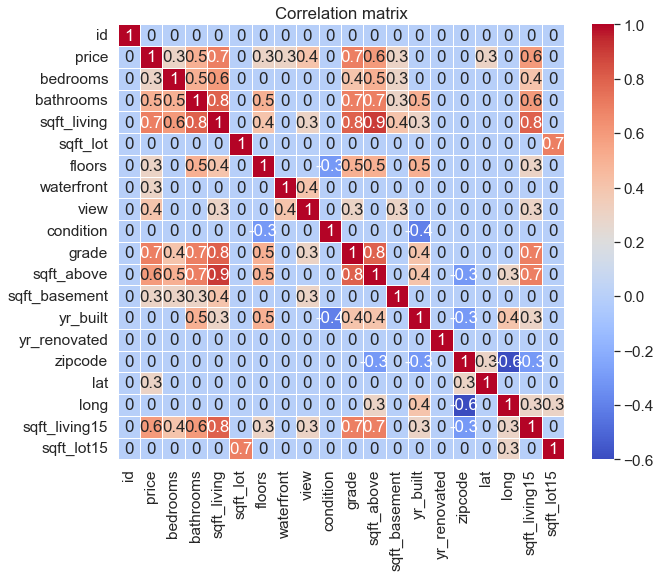

In [15]:
plt.figure(figsize=(10, 8))
sns.set(font_scale=1.4)
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='coolwarm')
plt.title('Correlation matrix');

Из анализа корреляционных данных видно, что более всего цена зависит от жилой площади дома и его оценки(grade). Зависимость от связанных с жилой площадью параметров (общей площади, sqft_living15, площади подвала, количества ванных комнат и спален) вполне ожидаема и вряд-ли стоит расмматривать их отдельно. Так-же видно, что цена зависит от вида из окна и этажности строения. Примечательна некоторая зависимость цены от широты.
    Посмотрим на георафическое расположение домов.

In [16]:
df['tick_price'] = df['price'] // (df['price'].max()/30)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,tick_price
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0.0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2.0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0.0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2.0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1.0


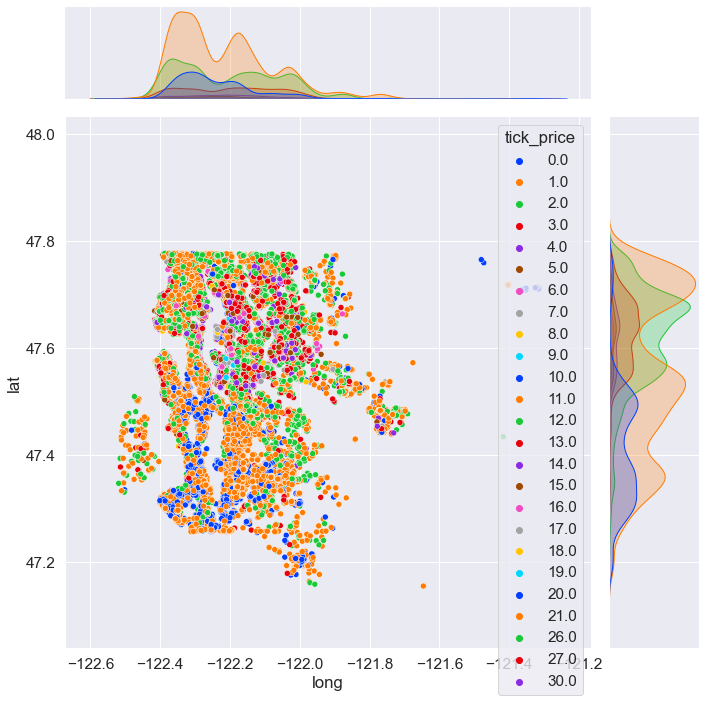

In [21]:
sns.jointplot(x='long', y='lat', data = df,palette='bright', hue='tick_price', height = 10);

Похоже на прибрежный город (город вытянут по долготе), цена жилья в котором в центре выше, чем на окраинах. По гистограмме справа видно, что максимум плотности дешёвого жилья сдвинут к югу, в то время как самое дорогое жильё сосредоточено в основном в цетре города, севернее. Плотность-же распределения по долготе примерно одинакова и для дорого, и для среднего, и для дешёвого жилья. Скорее всего такое поведение и обусловлено геометрической формой города.

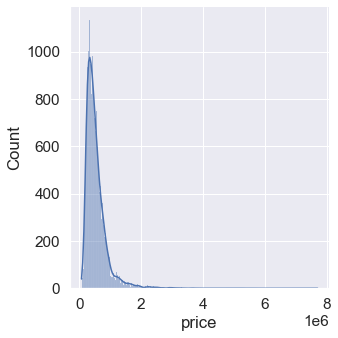

In [22]:
#plt.figure(figsize=(5, 5))
sns.displot(data=df, x="price", kde=True);# sns.distplot/sns.kdeplot/plt.hist

Из этого графика видно, что основная масса предложений сосредоточена в области стоимости до 100000. То-же самое в другом представлении видно и на следующем графике.

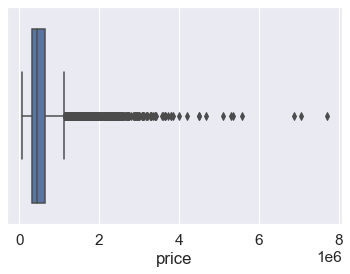

In [23]:
sns.boxplot(x=df['price'], whis=1.5);

Теперь рассмотрим зависимость стоимости жилья от оценки вида, открывающегося из окна.

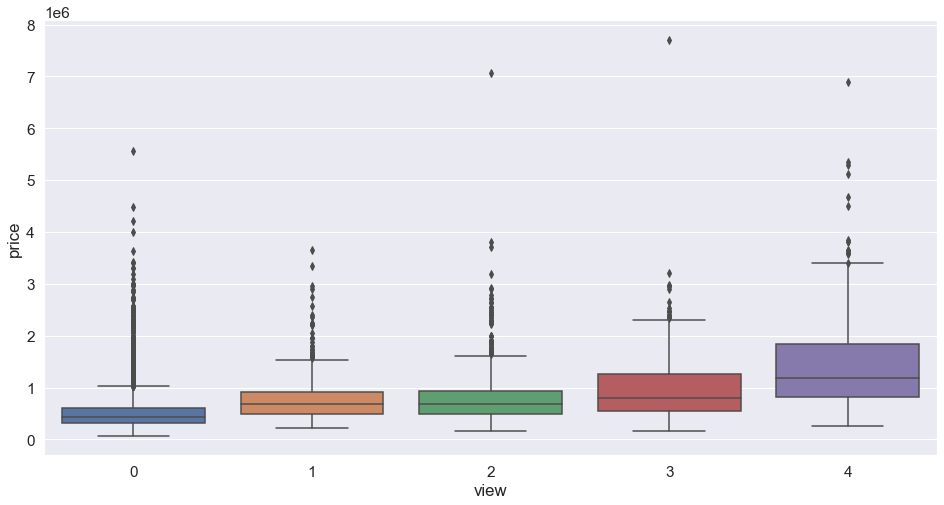

In [25]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['view'], y=df['price'], whis=1.5);

Интересно, что виды с оценками 1 и 2 практически не имеют разницы в стоимости, в то время как общая тенденция к увеличению стоимости от качества обстановки за окном прослеживается. Однако с увеличением оценки растёт и разброс цен (дисперсия), и цена на жильё даже с лучшим видом может быть меньше, чем цена на жильё с оценкой 1, из чего я делаю вывод, что всё-таки вид из окна не является сильным фактором в формировании цены. Что, собственно, и было показано ранее на графике корелляции.

Посмотрим подробнее на зависимость цены от этажности строений.

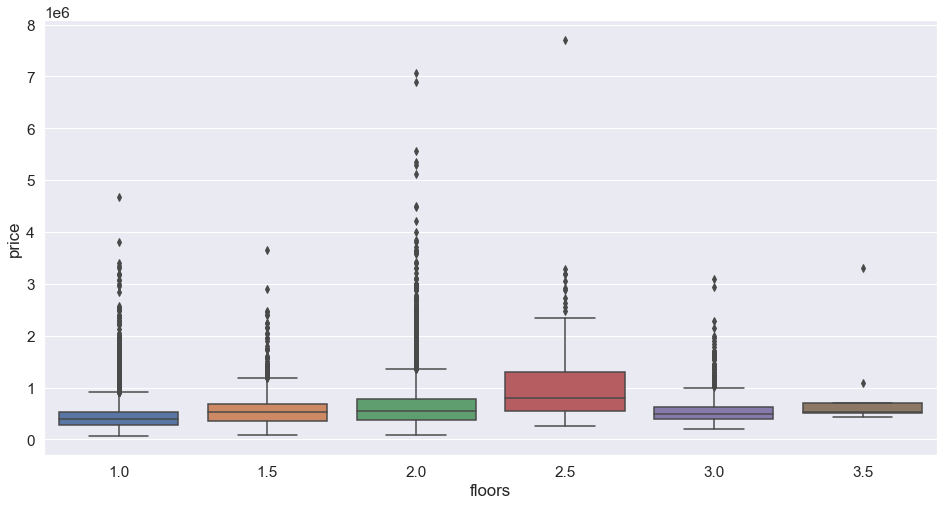

In [26]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['floors'], y=df['price'], whis=1.5);

Тут возникает странность. Вроде не заметно явной зависимости. Думаю, такая неочевидность связана с относительно малым количеством домов этажности (2,5), 3 и (3,5) и из-за этого плохой работы алгоритма. Рассмотрим другой график.

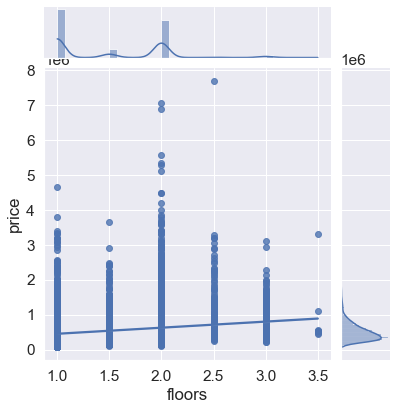

In [27]:
sns.jointplot(x=df['floors'], y=df['price'], kind='reg');

Здесь тенденция явно просматривается. Однако это естественно, поскольку в доме с большим количеством этажей явно больше жилой площади. А сильная зависимость цены от размера жилой площади уже была рассмотрена ранее.

Ну и, напоследок, рассмотрим зависимость от общей оценки дома (grade).

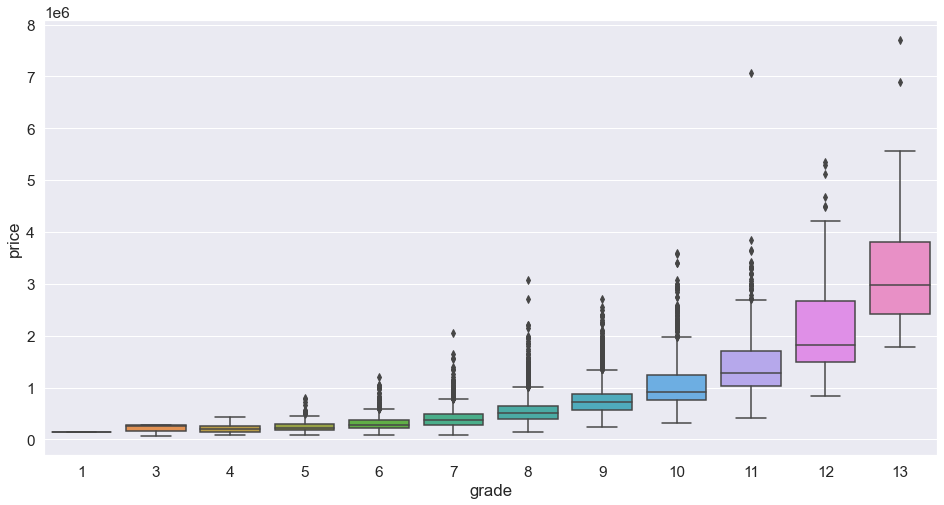

In [28]:
plt.figure(figsize=(16, 8))
sns.boxplot(x=df['grade'], y=df['price'], whis=1.5);

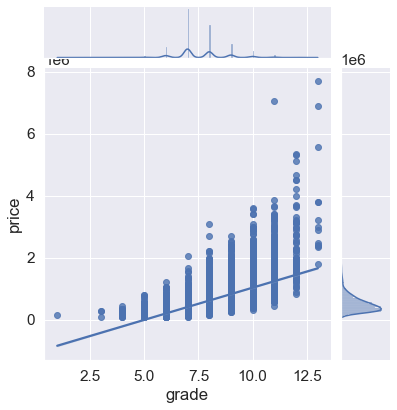

In [29]:
#sns.displot(data=df, x="grade", kde=True);
sns.jointplot(x=df['grade'], y=df['price'], kind='reg');

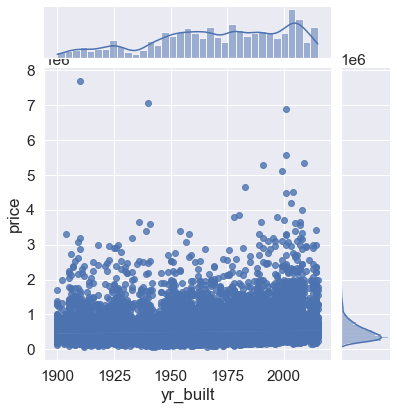

In [30]:
sns.jointplot(x=df['yr_built'], y=df['price'], kind='reg');

Что меня удивило, так это отсутствие заметного влияния года постройки здания на его стоимость. Видимо, подобная характеристика вполне компенсируется общим состоянием дома.